# Aprendizaje Supervisado: Clasificadores


In [1]:
# Importar librerias
import pandas as pd
from sklearn import datasets

In [2]:
# Importar conjunto de datos
dataset = datasets.load_breast_cancer()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [3]:
# Observar columnas en el conjunto de datos
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [4]:
# Examinar los datos
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# Encontrar dimensiones del conjunto de datos
df.shape

(569, 31)

In [6]:
# Mostrar cantidad de instancias por clase
df.groupby('target').size()

target
0    212
1    357
dtype: int64

In [7]:
# Verificar 
print('Caracteristicas del dataset:')
df.describe()

Caracteristicas del dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
# Definir los datos correspondientes a las etiquetas
y = df.target

# Seleccionar todas las columnas, excepto la etiqueta
X = df.drop('target', axis=1)

In [9]:
# Visualizar variables
display('y:',y)
display('X:',X)

'y:'

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

'X:'

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
########## IMPLEMENTACIÓN DE K VECINOS MÁS CERCANOS ##########
from sklearn.model_selection import train_test_split

# Separar los datos del dataset en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## K-NN

In [11]:
# Definir el algoritmo a utilizar
from sklearn.neighbors import KNeighborsClassifier
algoritmo = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

In [12]:
# Visualizar variables
display('y_pred:',y_pred)
display('X_test:',X_test)

'y_pred:'

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1])

'X_test:'

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
67,11.310,19.04,71.80,394.1,0.08139,0.04701,0.037090,0.022300,0.1516,0.05667,...,12.330,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.1297,0.13570,0.06880,0.02564,0.3105,0.07409
39,13.480,20.82,88.40,559.2,0.10160,0.12550,0.106300,0.054390,0.1720,0.06419,...,15.530,26.02,107.30,740.4,0.1610,0.42250,0.50300,0.22580,0.2807,0.10710
141,16.110,18.05,105.10,813.0,0.09721,0.11370,0.094470,0.059430,0.1861,0.06248,...,19.920,25.27,129.00,1233.0,0.1314,0.22360,0.28020,0.12160,0.2792,0.08158
424,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.019670,0.2538,0.07029,...,11.210,23.17,71.79,380.9,0.1398,0.13520,0.02085,0.04589,0.3196,0.08009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,16.780,18.80,109.30,886.3,0.08865,0.09182,0.084220,0.065760,0.1893,0.05534,...,20.050,26.30,130.70,1260.0,0.1168,0.21190,0.23180,0.14740,0.2810,0.07228
161,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.119300,0.096670,0.1741,0.05176,...,22.030,17.81,146.60,1495.0,0.1124,0.20160,0.22640,0.17770,0.2443,0.06251
207,17.010,20.26,109.70,904.3,0.08772,0.07304,0.069500,0.053900,0.2026,0.05223,...,19.800,25.05,130.00,1210.0,0.1111,0.14860,0.19320,0.10960,0.3275,0.06469
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,...,15.150,31.82,99.00,698.8,0.1162,0.17110,0.22820,0.12820,0.2871,0.06917


In [13]:
# Seleccionar los elementos en base a la ubicación: 371
df.iloc[371]

mean radius                 15.190000
mean texture                13.210000
mean perimeter              97.650000
mean area                  711.800000
mean smoothness              0.079630
mean compactness             0.069340
mean concavity               0.033930
mean concave points          0.026570
mean symmetry                0.172100
mean fractal dimension       0.055440
radius error                 0.178300
texture error                0.412500
perimeter error              1.338000
area error                  17.720000
smoothness error             0.005012
compactness error            0.014850
concavity error              0.015510
concave points error         0.009155
symmetry error               0.016470
fractal dimension error      0.001767
worst radius                16.200000
worst texture               15.730000
worst perimeter            104.500000
worst area                 819.100000
worst smoothness             0.112600
worst compactness            0.173700
worst concav

In [14]:
# Seleccionar los elementos en base a la ubicación: 30
df.iloc[30]

mean radius                  18.630000
mean texture                 25.110000
mean perimeter              124.800000
mean area                  1088.000000
mean smoothness               0.106400
mean compactness              0.188700
mean concavity                0.231900
mean concave points           0.124400
mean symmetry                 0.218300
mean fractal dimension        0.061970
radius error                  0.830700
texture error                 1.466000
perimeter error               5.574000
area error                  105.000000
smoothness error              0.006248
compactness error             0.033740
concavity error               0.051960
concave points error          0.011580
symmetry error                0.020070
fractal dimension error       0.004560
worst radius                 23.150000
worst texture                34.010000
worst perimeter             160.500000
worst area                 1670.000000
worst smoothness              0.149100
worst compactness        

In [15]:
# Calcular la exactitud del modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo K-NN:')
print(accuracy)

Exactitud del modelo K-NN:
0.9385964912280702


In [16]:
# Visualizar variable
display('X_test:', X_test)

'X_test:'

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
67,11.310,19.04,71.80,394.1,0.08139,0.04701,0.037090,0.022300,0.1516,0.05667,...,12.330,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.1297,0.13570,0.06880,0.02564,0.3105,0.07409
39,13.480,20.82,88.40,559.2,0.10160,0.12550,0.106300,0.054390,0.1720,0.06419,...,15.530,26.02,107.30,740.4,0.1610,0.42250,0.50300,0.22580,0.2807,0.10710
141,16.110,18.05,105.10,813.0,0.09721,0.11370,0.094470,0.059430,0.1861,0.06248,...,19.920,25.27,129.00,1233.0,0.1314,0.22360,0.28020,0.12160,0.2792,0.08158
424,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.019670,0.2538,0.07029,...,11.210,23.17,71.79,380.9,0.1398,0.13520,0.02085,0.04589,0.3196,0.08009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,16.780,18.80,109.30,886.3,0.08865,0.09182,0.084220,0.065760,0.1893,0.05534,...,20.050,26.30,130.70,1260.0,0.1168,0.21190,0.23180,0.14740,0.2810,0.07228
161,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.119300,0.096670,0.1741,0.05176,...,22.030,17.81,146.60,1495.0,0.1124,0.20160,0.22640,0.17770,0.2443,0.06251
207,17.010,20.26,109.70,904.3,0.08772,0.07304,0.069500,0.053900,0.2026,0.05223,...,19.800,25.05,130.00,1210.0,0.1111,0.14860,0.19320,0.10960,0.3275,0.06469
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,...,15.150,31.82,99.00,698.8,0.1162,0.17110,0.22820,0.12820,0.2871,0.06917


## Naive Bayes

In [17]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
algoritmo = GaussianNB()

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

In [18]:
# Calcular la exactitud del modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Naive Bayes:')
print(accuracy)

Exactitud del modelo Naive Bayes:
0.9298245614035088


## SVC

In [19]:
# SVC
from sklearn.svm import SVC
algoritmo = SVC(kernel = 'linear')

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

In [20]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo SVC:')
print(accuracy)

Exactitud del modelo SVC:
0.956140350877193


## Logistic Regression

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression(max_iter = 10000)

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

In [22]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Regresión Logística:')
print(accuracy)

Exactitud del modelo Regresión Logística:
0.956140350877193


## Árboles de decisión

In [23]:
# Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion = 'entropy')

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

In [24]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Árboles de Decisión:')
print(accuracy)

Exactitud del modelo Árboles de Decisión:
0.9035087719298246


## Bosques Aleatorios

In [25]:
# Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier
algoritmo = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

In [26]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Bosques Aleatorios:')
print(accuracy)

Exactitud del modelo Bosques Aleatorios:
0.9736842105263158


## Pregunta

**¿Cuál modelo obtuvo una mejor exactitud?**

Entre todos los modelos, el modelo de Bosques Aleatorios tiene una mejor exactitud dada por 0.9473684210526315. Posterior a este modelo, se encuentran los modelos SVC y Logistic Regression. Ambos con una exactitud de 0.9298245614035088

## Escalamiento

In [27]:
# Agregar Escalamiento de Datos
from sklearn import preprocessing
std_scl=preprocessing.StandardScaler()
X_train_array = std_scl.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = std_scl.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

In [28]:
# Visualizar variable
display('X_test:', X_test)

'X_test:'

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
67,-0.816177,-0.026050,-0.845153,-0.746978,-1.077864,-1.083810,-0.647783,-0.685617,-1.035504,-0.868987,...,-0.825742,-0.271433,-0.882565,-0.728173,-0.147103,-1.046767,-0.623454,-0.688592,-0.772841,-1.011931
46,-1.691564,-0.536641,-1.663059,-1.280835,-0.749579,-0.850370,-0.910728,-1.101004,-0.119122,0.324658,...,-1.516698,-0.576044,-1.495065,-1.114258,-0.116477,-0.762442,-0.992467,-1.360028,0.347126,-0.566056
39,-0.206162,0.387065,-0.169332,-0.288393,0.361321,0.391447,0.210226,0.128017,-0.296603,0.204722,...,-0.168862,0.081786,-0.017269,-0.257475,1.252964,1.081616,1.126921,1.696480,-0.126278,1.350397
141,0.533165,-0.255816,0.510560,0.416565,0.048702,0.169660,0.063568,0.255804,0.214108,-0.039433,...,0.732295,-0.039734,0.623582,0.589678,-0.042098,-0.197266,0.039404,0.105313,-0.150108,-0.131211
424,-1.256963,-0.007483,-1.246981,-1.036961,0.781469,-0.401158,-0.996839,-0.752300,2.666244,1.075683,...,-1.055650,-0.379991,-1.065961,-0.875728,0.325419,-0.765657,-1.226518,-1.050804,0.491689,-0.217715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,0.721511,-0.081751,0.681551,0.620165,-0.560868,-0.241585,-0.063504,0.416300,0.330014,-1.058885,...,0.758981,0.127154,0.673787,0.636112,-0.680879,-0.272494,-0.196843,0.499287,-0.121513,-0.671138
161,1.398993,-0.745520,1.373656,1.372065,-0.682640,0.259879,0.371390,1.200015,-0.220540,-1.570039,...,1.165425,-1.248457,1.143350,1.040255,-0.873388,-0.338721,-0.223201,0.961978,-0.704531,-1.238352
207,0.786167,0.257096,0.697836,0.670162,-0.627095,-0.594564,-0.245990,0.115593,0.811748,-1.502932,...,0.707662,-0.075380,0.653114,0.550124,-0.930266,-0.679498,-0.385254,-0.077931,0.617189,-1.111789
49,-0.203351,0.730554,-0.229993,-0.283394,-0.641337,-0.520509,-0.518604,-0.393024,0.025760,-0.796169,...,-0.246867,1.021544,-0.262387,-0.329017,-0.707130,-0.534829,-0.214415,0.206097,-0.024608,-0.851695


In [29]:
# Definir el algoritmo a utilizar
from sklearn.neighbors import KNeighborsClassifier
algoritmo = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

# Calcular la exactitu del modulo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo K-NN con datos escalados:')
print(accuracy)

Exactitud del modelo K-NN con datos escalados:
0.9912280701754386


### Naive Bayes

In [30]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
algoritmo = GaussianNB()

#Entrenar el modelo
algoritmo.fit(X_train, y_train)

#Realizar una predicción
y_pred = algoritmo.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Naive Bayes:')
print(accuracy)

Exactitud del modelo Naive Bayes:
0.9385964912280702


### SVC

In [31]:
# SVC
from sklearn.svm import SVC
algoritmo = SVC(kernel = 'linear')

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo SVC:')
print(accuracy)

Exactitud del modelo SVC:
0.9649122807017544


### Logic Regression

In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression(max_iter = 10000)

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Regresión Logística:')
print(accuracy)

Exactitud del modelo Regresión Logística:
0.9824561403508771


### Árboles de decisión

In [33]:
# Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion = 'entropy')

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Árboles de Decisión:')
print(accuracy)

Exactitud del modelo Árboles de Decisión:
0.9035087719298246


### Bosques aleatorios

In [34]:
# Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier
algoritmo = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Bosques Aleatorios:')
print(accuracy)

Exactitud del modelo Bosques Aleatorios:
0.9824561403508771


## Conclusión

Después de aplicar el escalamiento, algunos modelos mejoraron y otros empeoraron un poco respecto a su exactitud. Ahora el modelo con mejor exactitud es el de Logistic Regression con una exactitud de 0.9824561403508771. A su vez, los modelos Naive Bayes y Árboles de decisión bajaron su exactitud por aproximadamente -0.01. 

## Aplicación del modelo de red neuronal

Construiremos un modelo de red neuronal usando la libreria scikit-learn.

In [35]:
# Importar 'MLPClassifier'
from sklearn.neural_network import MLPClassifier

# Se crea una instancia del modelo establecida en tres capas.
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

**Explicación de parámetros: ReLU y Adam**

ReLU es la función de activación más utilizada porque no es lineal y tiene la capacidad de no activar todas las neuronas al mismo tiempo. Y con el optimizador adam no necesitamos especificar la tasa de aprendizaje, como ocurre con el descenso de gradiente. El uso de "adam", por lo tanto, nos ahorra la tarea de optimizar la tasa de aprendizaje para nuestro modelo.

In [36]:
# Se ajusta el modelo a los datos de entrenamiento     
mlp.fit(X_train,y_train)

# Se genera predicciones sobre el conjunto de datos de entrenamiento y prueba
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

# Importar módulos
from sklearn.metrics import classification_report,confusion_matrix

# Imprimir matriz de confusión y los resultados del informe de confusión sobre los datos de entrenamiento
print('Entrenamiento:')
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

# Imprimir matriz de confusión y los resultados del informe de confusión sobre los datos de prueba
print('Prueba:')
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

Entrenamiento:
[[169   0]
 [  0 286]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Prueba:
[[42  1]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Visualización de árboles de Decisión

Agregaremos el código de las cuatro formas que permiten visualizar el árbol de predicción de cáncer:

1. Representar de árbol de decisión en texto impreso

2. Graficar árbol de decisión con plot_tree

3. Visualizar árbol de decisión con graphviz

4. Graficar árbol de decisión con el paquete graphviz 

In [37]:
# Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion = 'entropy')

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

### Representar árbol de decisión en texto impreso

In [38]:
# Importar librerias
from sklearn import tree

# Representar árbol de decisión en texto impreso
text_representation = tree.export_text(algoritmo)
print(text_representation)

|--- feature_22 <= 0.24
|   |--- feature_27 <= 0.27
|   |   |--- feature_13 <= -0.04
|   |   |   |--- feature_21 <= 0.70
|   |   |   |   |--- class: 1
|   |   |   |--- feature_21 >  0.70
|   |   |   |   |--- feature_14 <= -1.14
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  -1.14
|   |   |   |   |   |--- feature_24 <= 0.24
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_24 >  0.24
|   |   |   |   |   |   |--- feature_7 <= -0.63
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_7 >  -0.63
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- feature_13 >  -0.04
|   |   |   |--- feature_19 <= -0.34
|   |   |   |   |--- class: 0
|   |   |   |--- feature_19 >  -0.34
|   |   |   |   |--- feature_26 <= 0.27
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_26 >  0.27
|   |   |   |   |   |--- class: 0
|   |--- feature_27 >  0.27
|   |   |--- feature_21 <= 0.22
|   |   |   |--- feature_27 <= 0.88
|   |   | 

### Graficar árbol de decisión con plot_tree

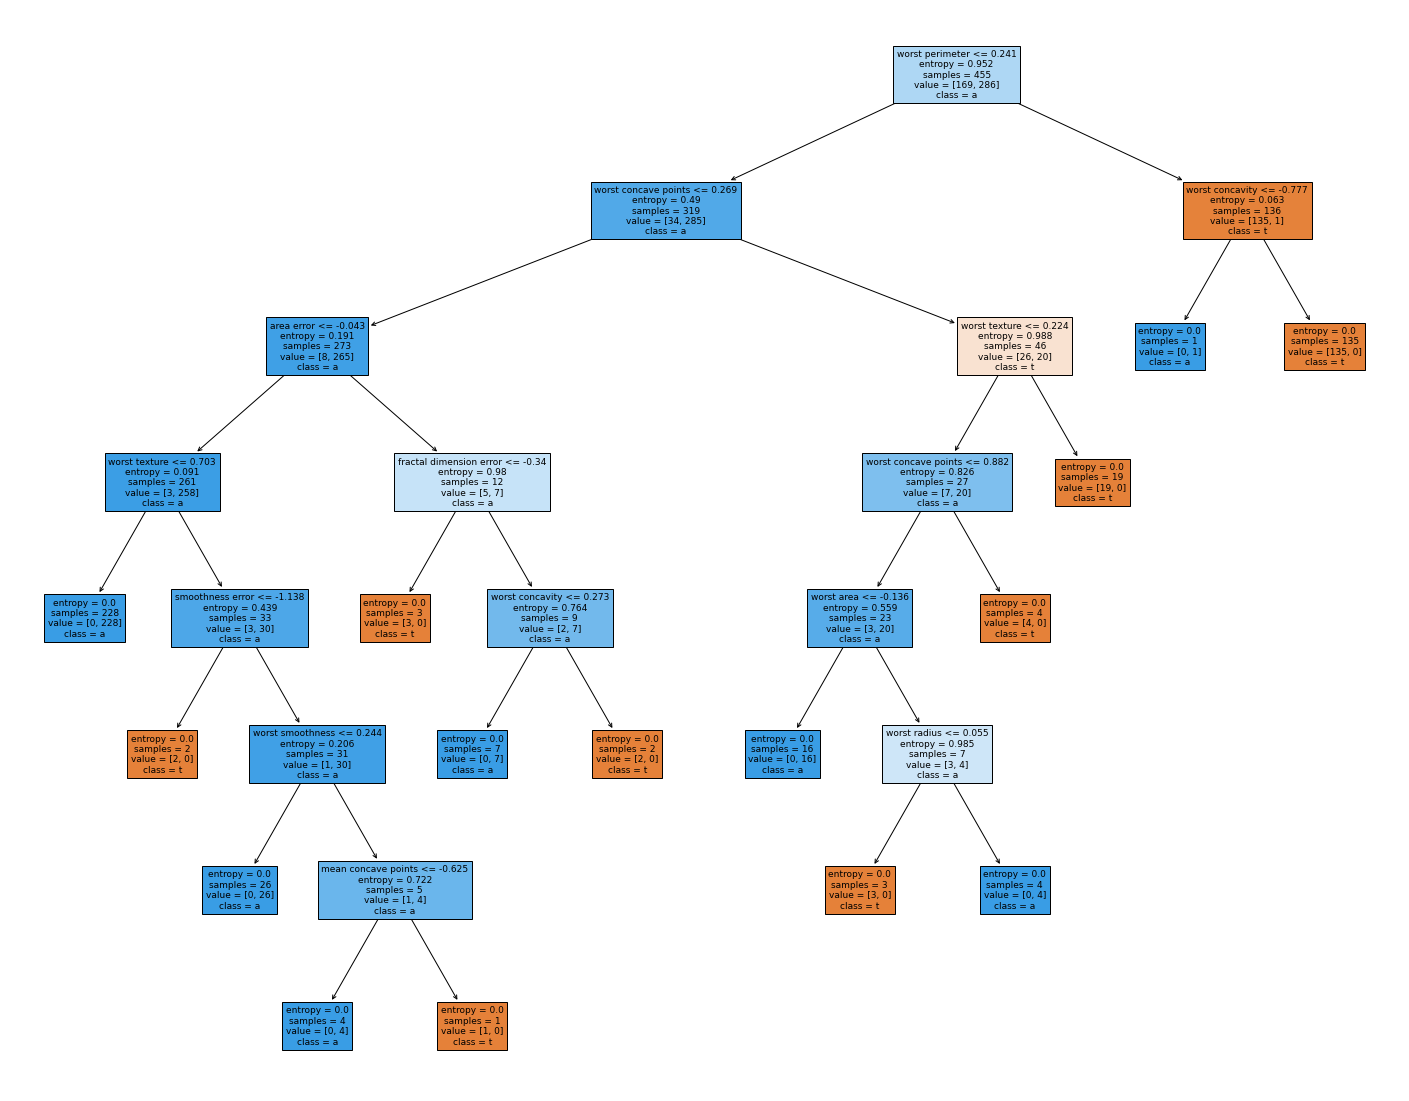

In [39]:
# Importar librerias
from matplotlib import pyplot as plt

# Graficar árbol de decisión con plot_tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(algoritmo, 
                   feature_names=X.columns,  
                   class_names=y.name,
                   filled=True)

# Guardar imagen del árbol de decisión en png
fig.savefig("decistion_tree.png")

### Visualizar árbol de decisión con graphviz

In [40]:
# Importar libreria
import graphviz

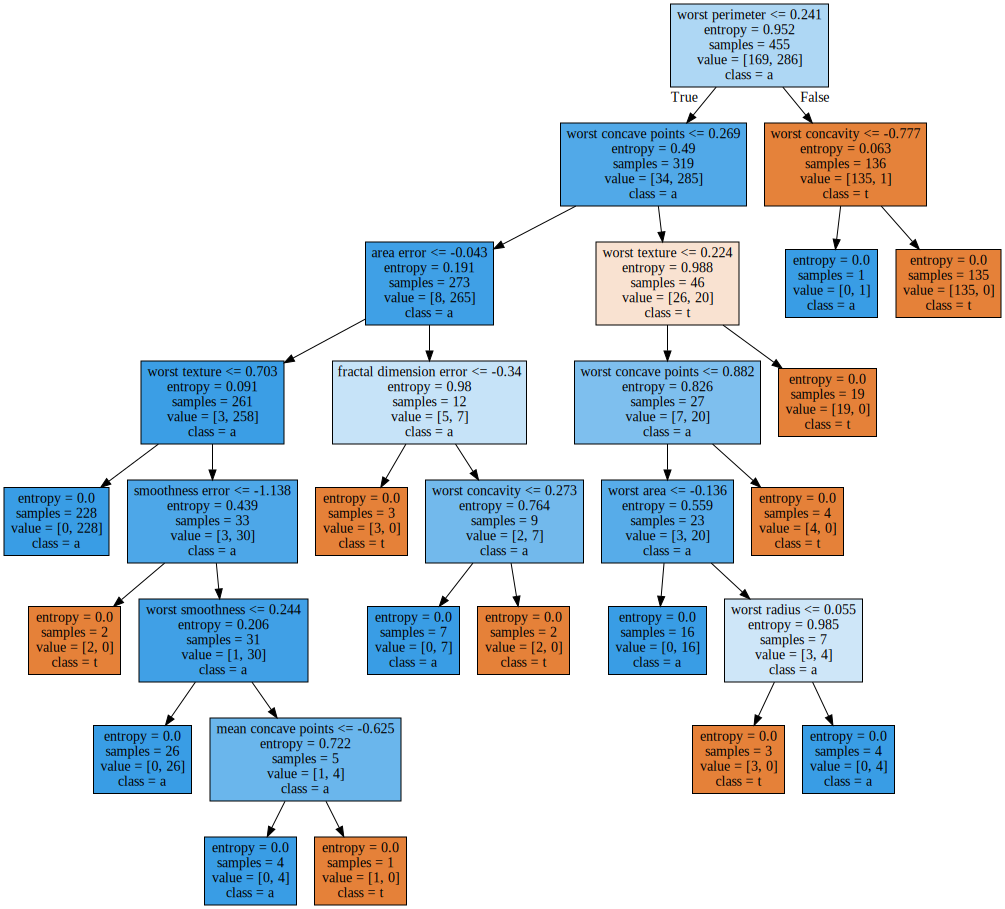

'decision_tree_graphivz.png'

In [41]:
# Exportar a DOT data
dot_data = tree.export_graphviz(algoritmo, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y.name,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
display(graph)

# Guardar imagen del árbol de decisión en png
graph.render("decision_tree_graphivz")

### Graficar árbol de decisión con el paquete dtreeviz 

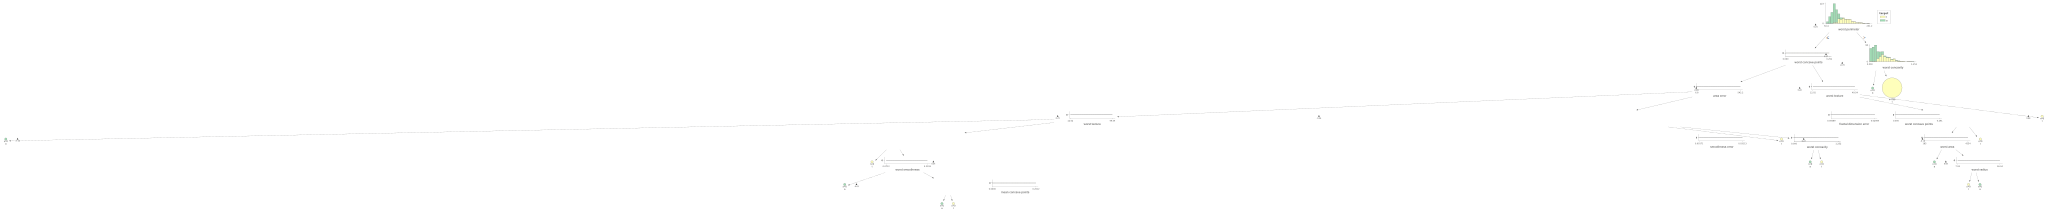

In [42]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(algoritmo, X, y,
                target_name="target",
                feature_names=X.columns,
                class_names=list(y.name))

display(viz)

# Guardar imagen del árbol de decisión en png
viz.save("decision_tree.svg")